<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/linear-regression/linear_regression_bostonhousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data: Boston Housing Dataset
# Model: Linear Regression from sklearn

**Import CSV input data from GH**

In [1]:
! wget https://github.com/dataprofessor/data/raw/master/BostonHousing.csv

--2022-04-14 07:25:27--  https://github.com/dataprofessor/data/raw/master/BostonHousing.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv [following]
--2022-04-14 07:25:27--  https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36242 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  35.39K  --.-KB/s    in 0.003s  

2022-04-14 07:25:27 (12.7 MB/s) - ‘BostonHousing.csv’ saved [36242/36242]



**Import Library**

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

**Load Boston Housing data**

In [21]:
BostonHousing = pd.read_csv("BostonHousing.csv")
BostonHousing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


**Preprocessing data - Mean Normalization**

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

StandardScaler = StandardScaler()
MinMaxScaler = MinMaxScaler()

df = StandardScaler.fit_transform(BostonHousing)
BostonHousing_scaled = pd.DataFrame(df,columns = ['crim','zn','indus','chaos','nox','rm','age','dis','rad','tax','ptratio','b','lstat','medv'])

df1 = MinMaxScaler.fit_transform(BostonHousing)
BostonHousing_scaled1 = pd.DataFrame(df,columns = ['crim','zn','indus','chaos','nox','rm','age','dis','rad','tax','ptratio','b','lstat','medv'])



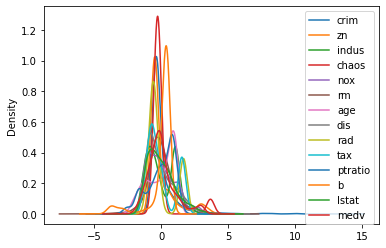

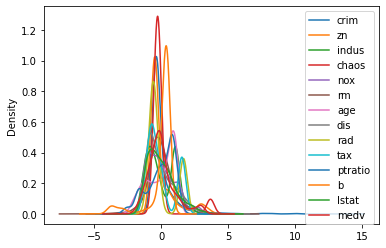

In [56]:
BostonHousing_scaled.plot.kde()
BostonHousing_scaled1.plot.kde()

**Create X and Y variables**

In [47]:
Y = BostonHousing.medv
X = BostonHousing_scaled.drop(columns='medv', axis=1)
X

,crim,zn,indus,chaos,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


**Data Split into train and test data**

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [59]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


**Linear Regression Model**

In [60]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

**Build Linear Regression Model**

In [61]:
model = linear_model.LinearRegression()

**Fit Training Data X, Y to the model**

In [62]:
model.fit(X_train,Y_train)

LinearRegression()

**Apply model to Test Data to predict Y**

In [63]:
Y_pred = model.predict(X_test)

**Prediction Results and Coefficients**

In [64]:
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Mean Squared Error: %.2f" % mean_squared_error(Y_test,Y_pred))
print("Coefficient of Determination: %.2f" % r2_score(Y_test,Y_pred))

Coefficients:  [-0.91302964  0.99880332  0.26933796  0.60589928 -1.84447135  3.08861748
 -0.07548957 -2.92466771  2.31220356 -1.89542963 -1.9690291   0.89933021
 -3.82299759]
Intercept:  22.37215093811251
Mean Squared Error: 28.37
Coefficient of Determination: 0.63


**Plot Predictions**

In [65]:
import seaborn as sb

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


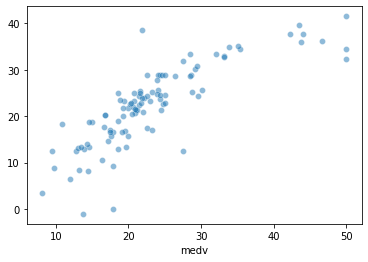

In [66]:
sb.scatterplot(Y_test,Y_pred,alpha=0.5)